In [1]:
import sys, os.path as osp, yaml, argparse, logging, math, numpy as np, torch, logging, time
sys.path.append('/scratch') # This line is equivalent to doing source scripts/source_me.sh in a bash terminal
from torch.utils.data import DataLoader
from Core.trainers import Trainer
import glob
from Core import utils
from SparseNOvA import datasets

In [2]:
"read config file"
with open('/scratch/SparseNOvA/config/nova_sparse_fishnet.yaml') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

def collate_tool(batch):
    feats = torch.cat([d['yfeats'] for d in batch])
    print(feats)
    return feats

config['data']['t_v_split'] = 0.2

#datasets
limit = 5*config["data_loader"]["batch_size"] if config["trainer"]["debug"] else None
full_dataset = datasets.get_dataset(subdir = "validation", apply_jitter = True, standardize_input = True, **config['data'])
fulllen = len(full_dataset)
tv_num = math.ceil(fulllen*config['data']['t_v_split'])
splits = np.cumsum([fulllen-tv_num,tv_num])
collate = collate_tool
# valid_dataset = torch.utils.data.Subset(full_dataset,np.arange(start=splits[0],stop=splits[1]))
# valid_dataset = torch.utils.data.Subset(full_dataset,np.arange(start=0,stop=splits[0]))
# valid_loader = DataLoader(valid_dataset, batch_size =50,shuffle=False, collate_fn=collate_tool)

In [3]:
full_loader = DataLoader(full_dataset, **config['data_loader'],shuffle=False, collate_fn=collate_tool, drop_last=True)

In [4]:
data = torch.load('/data/p5/processed/tauswap_nu/b1_c0_r25214_sr37_e388_se2.pt')

In [5]:
print(data.keys())

dict_keys(['xfeats', 'xcoords', 'xsegtruth', 'xinstruth', 'yfeats', 'ycoords', 'ysegtruth', 'yinstruth', 'evttruth'])


In [4]:
import time 
import tqdm
allm = None
allstd = None
batch_size = 50
n_batches = int(math.ceil(len(full_loader)/batch_size))
full_loader = DataLoader(full_dataset, **config['data_loader'],shuffle=False, collate_fn=collate_tool, drop_last=True)
t = tqdm.tqdm(enumerate(full_loader),total=n_batches)
start_time = time.time()
for i, data in t:
    if i ==100: break
    if allm is None:
        allm = data.mean(dim=0)[None]
    if allm is not None:
        allm = torch.cat((allm,data.mean(dim=0)[None]))
    print(data.mean(dim=0))
    
    if allstd is None:
        allstd = data.std(dim=0)[None]
    if allstd is not None:
        allstd = torch.cat((allstd,data.std(dim=0)[None]))
    print(data.std(dim=0))
    
print('******************')
print('mean = ', allm.mean(dim=0))
print('sigma = ', allstd.mean(dim=0))
print("took --- %s seconds ---" % (time.time() - start_time))

 14%|█▍        | 1/7 [00:00<00:03,  1.54it/s]

tensor([14.4864])
tensor([16.0955])
tensor([14.3487])
tensor([15.8800])
tensor([14.0953])
tensor([15.3398])
tensor([14.6514])
tensor([15.9536])
tensor([14.5815])
tensor([16.2948])


 86%|████████▌ | 6/7 [00:01<00:00,  5.80it/s]

tensor([14.2914])
tensor([15.2993])
tensor([14.4701])
tensor([15.8936])
tensor([14.8783])
tensor([17.0467])
tensor([14.8649])
tensor([16.7485])
tensor([14.2622])
tensor([15.4851])


11it [00:01,  7.39it/s]                      

tensor([14.4962])
tensor([16.6498])
tensor([14.4869])
tensor([16.0203])
tensor([15.1588])
tensor([18.1254])
tensor([14.4183])
tensor([15.3448])
tensor([14.7812])
tensor([16.9494])


16it [00:02,  8.03it/s]

tensor([14.8840])
tensor([17.0729])
tensor([14.3894])
tensor([16.1324])
tensor([14.9095])
tensor([16.9597])
tensor([14.6283])
tensor([16.2356])
tensor([14.6050])
tensor([16.1901])


22it [00:03,  7.84it/s]

tensor([14.3280])
tensor([16.1067])
tensor([14.3709])
tensor([15.7409])
tensor([14.4928])
tensor([16.3301])
tensor([14.5522])
tensor([16.0209])
tensor([14.7957])
tensor([16.9844])


29it [00:03, 10.19it/s]

tensor([14.5955])
tensor([16.9953])
tensor([14.7103])
tensor([17.1238])
tensor([14.5866])
tensor([16.0162])
tensor([14.5781])
tensor([16.2496])
tensor([14.4364])
tensor([15.8851])


34it [00:04, 10.35it/s]

tensor([14.2778])
tensor([15.5428])
tensor([14.6850])
tensor([16.8971])
tensor([14.7030])
tensor([17.1180])
tensor([14.4846])
tensor([16.4235])
tensor([14.4652])
tensor([16.3010])


40it [00:04, 10.07it/s]

tensor([14.7152])
tensor([17.1829])
tensor([14.6218])
tensor([16.3130])
tensor([14.0593])
tensor([14.5939])
tensor([14.7390])
tensor([16.9774])
tensor([14.1588])
tensor([15.8450])


45it [00:05,  9.81it/s]

tensor([14.4647])
tensor([16.4336])
tensor([15.0080])
tensor([17.6972])
tensor([14.3939])
tensor([16.0524])
tensor([14.2056])
tensor([15.3957])
tensor([14.4802])
tensor([16.1690])


47it [00:05,  7.73it/s]

tensor([14.4048])
tensor([15.5845])
tensor([14.4475])
tensor([15.8880])
tensor([14.2976])
tensor([15.6214])
tensor([14.4938])
tensor([16.1399])


50it [00:06,  9.67it/s]

tensor([14.4165])
tensor([15.8832])


52it [00:06,  7.87it/s]

tensor([14.0695])
tensor([15.4666])
tensor([14.6536])
tensor([16.7109])
tensor([14.1992])
tensor([15.2139])
tensor([14.2846])
tensor([16.1280])


55it [00:06,  9.51it/s]

tensor([14.3564])
tensor([15.2013])


57it [00:07,  7.39it/s]

tensor([14.5935])
tensor([16.6042])
tensor([14.1356])
tensor([15.2647])
tensor([14.6006])
tensor([16.4880])
tensor([14.6263])
tensor([16.3193])


60it [00:07,  8.47it/s]

tensor([14.4863])
tensor([16.4532])


62it [00:07,  7.92it/s]

tensor([14.4015])
tensor([15.5121])
tensor([14.5389])
tensor([16.5601])
tensor([14.7045])
tensor([16.4863])
tensor([14.4958])
tensor([15.8501])


65it [00:07,  8.56it/s]

tensor([14.6987])
tensor([17.2133])


66it [00:08,  7.50it/s]

tensor([14.6397])
tensor([16.2351])
tensor([14.2999])
tensor([15.7679])
tensor([14.4457])
tensor([15.8903])
tensor([14.1748])
tensor([15.4984])


70it [00:08,  8.55it/s]

tensor([14.7748])
tensor([16.3538])


71it [00:08,  7.23it/s]

tensor([14.6329])
tensor([16.2285])
tensor([14.3620])
tensor([15.9463])
tensor([14.7229])
tensor([16.3288])
tensor([14.3082])
tensor([16.2744])


78it [00:09, 10.28it/s]

tensor([14.4796])
tensor([16.1056])
tensor([14.3086])
tensor([15.4884])
tensor([14.3302])
tensor([16.2790])
tensor([14.6893])
tensor([16.7258])
tensor([14.7496])
tensor([16.8092])


84it [00:10, 10.87it/s]

tensor([14.8474])
tensor([17.1752])
tensor([14.4466])
tensor([16.2234])
tensor([14.8154])
tensor([17.1724])
tensor([14.3762])
tensor([16.2647])
tensor([14.8378])
tensor([17.0515])


86it [00:10,  7.81it/s]

tensor([14.5392])
tensor([16.2634])
tensor([14.4033])
tensor([15.8274])
tensor([14.2351])
tensor([15.3944])
tensor([14.2389])
tensor([15.2675])
tensor([14.5981])
tensor([16.3518])


90it [00:11,  7.04it/s]

tensor([14.6980])
tensor([16.9711])
tensor([14.2391])
tensor([15.1735])
tensor([14.3664])
tensor([15.7924])
tensor([14.7866])
tensor([17.2818])
tensor([14.5921])
tensor([16.6028])


95it [00:11,  6.89it/s]

tensor([14.6673])
tensor([16.5342])
tensor([14.4522])
tensor([16.5954])
tensor([14.4331])
tensor([16.1203])
tensor([14.3603])
tensor([15.6756])
tensor([14.3818])
tensor([16.0869])


100it [00:12,  7.96it/s]

tensor([14.6604])
tensor([16.4317])
******************
mean =  tensor([14.5137])
sigma =  tensor([16.2276])
took --- 12.560780048370361 seconds ---


In [4]:
data = torch.load('/data/p5/processed/tauswap_nu/b1_c0_r25214_sr37_e388_se2.pt')

In [6]:
print(data.keys())

dict_keys(['xfeats', 'xcoords', 'xsegtruth', 'xinstruth', 'yfeats', 'ycoords', 'ysegtruth', 'yinstruth', 'evttruth'])


In [6]:
allm

tensor([[14.5281],
        [14.3992],
        [14.4367],
        [14.6346],
        [14.5244],
        [14.4577],
        [14.4690],
        [14.9295],
        [15.0668],
        [14.3993],
        [14.5934],
        [14.5495],
        [15.0885],
        [14.4660],
        [14.8984],
        [14.8869],
        [14.3967],
        [15.0645],
        [14.5975],
        [14.5828]])

In [5]:
import matplotlib.pyplot as plt

(array([ 5.,  8., 16., 27., 12., 17.,  8.,  6.,  1.,  1.]),
 array([14.059253, 14.169208, 14.279162, 14.389117, 14.499072, 14.609027,
        14.718982, 14.828937, 14.938891, 15.048846, 15.158801],
       dtype=float32),
 <BarContainer object of 10 artists>)

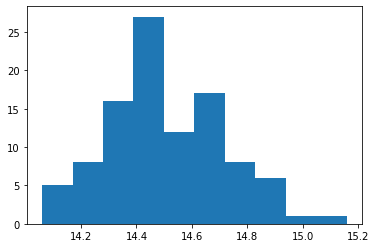

In [6]:
plt.hist(allm.numpy())

In [7]:
allm.mean()

tensor(14.5137)

(array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

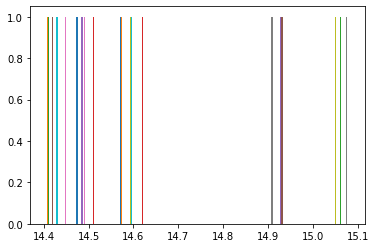

In [10]:
plt.hist(allm)